R Workshop 4
=======

July 12, 2017

---------------

# Review from Workshop 3

## Continuous Random Variables

We squeezed in continous random variables just before running out
of time in the last workshop.  Let's summarize some of the concepts.

Calculus provides us a convenient two-way relationship between
the CDF and the density function for a random variable.

$$
\begin{aligned}
f_X(x) &= \frac{dF_X}{dx} \\
F_X(b) - F_X(a) &= \int_a^b f_X(x)dx
\end{aligned}
$$

Expectation is the natural analog to summation for discrete random
variables.

$$
E[X] = \int_{-\infty}^{\infty} x f_X(x) dx
$$

Finally, the moment generating function is also analogous to the
discrete case.

$$
m_X(t) = E[e^{xt}] = \int_{-\infty}^{\infty} e^{xt} f_X(x) dx
$$

# Normal Random Variables

The granddaddy of all the distributions is the *normal distribution*.
It is also known as the *Gaussian distribution*.  It has the symmetric
"bell-shape" that most people recognize.  It has two parameters.

* $\mu$ - the mean of the distribution
* $\sigma^2$ - the variance of the distribution

The *probability density function* is

$$
f_X(x;\mu, \sigma^2) = \frac{1}{\sqrt{2\pi} \sigma}
       e^{\frac{1}{2} \left(\frac{x - \mu}{\sigma} \right)^2} \; x \in (-\infty, \infty)
$$

Sometimes a normal random variable with mean $\mu$ and variance
$\sigma^2$ is written $\mathcal{N}(\mu, \sigma^2)$.  The
"*standard normal*" is $\mathcal{N}(0,1)$.

The first thing different about this distribution than past ones
we've discussed is that it is a *continuous* distribution.  Its
domain is not a countable discrete set.  In the case of the normal
distribution, the domain is the entire real number line.

You might think that with parameter names like "mean" and "variance"
you would be off the hook to verify what they are.  Alas, here are
some verifications for you to make during your boring meetings over
the next two weeks.

1. Show the area under f_X is 1 with $\mu=0$ and $\sigma=1$.
   The integral is not obvious.  The trick is to compute its square:
   $\int_0^{\infty}f_X(x)dx \int_0^{\infty}f_X(y)dy$.  Convert
   the $x$ and $y$ to polar coordinates $r$ and $\theta$ and
   integrate in two dimensions.

2. Show that the moment generating function for 
   $\mathcal{N}(\mu, \sigma^2)$ is 
   $\mbox{exp}\left[t\mu + \left(\frac{t\sigma}{2}\right)^2\right]$.
   The trick is completing the square in the exponent.

3. Use the moment generating function for $\mathcal{N}(\mu, \sigma^2)$
   to verify the mean and variance.

The moment generating function for $\mathcal{N}(\mu, \sigma^2)$
comes in handy for more than simply calculating moments.  We'll
refer back to this when determining if a function of random
variables is normal through comparing the moment generating functions.

# Dates and Times

In this section we'll address several classes and functions that address dates
and times.

## Date

Dates are represented by the **Date** class.  Internally, it's the number of
days since January 1, 1970.  Create an instance of `Date` with the `as.Date()`
function.

In [1]:
x <- as.Date('2017-03-15')
x

[1] "2017-03-15"

The second parameter allows you to specify a different date format.

In [2]:
as.Date(c('3/15/17', '2/21/17'), '%m/%d/%y')
as.Date('20170315', '%Y%m%d')
as.Date('March 15, 2017', '%B %d, %Y')

[1] "2017-03-15" "2017-02-21"

[1] "2017-03-15"

[1] "2017-03-15"

In the examples above, we see that the format string uses a
percent sign to indicate a special field.

* `%d` - day of the month
* `%m` - number of the month
* `%y` - two digit year
* `%Y` - four digit year
* `%B` - full name of the month (in English).

A full list of the abbreviations can be found from the R help
for the `strptime` function which we'll be covering below.

```
?strptime
```

Note how the first example supplies a vector for the first
argument.  A column of a dataframe is often the first argument.

To retieve the current date, use `Sys.Date()`.

In [3]:
Sys.Date()

[1] "2017-07-11"

## Times

Times are represented by two nice classes with ugly names:
**POSIXct** and **POSIXlt**.

* `POSIXct` is just a large integer under the hood.  It's good
  for dataframe calculations.
* `POSIXlt` is a list that maintains info about day of the week,
  day of the year, day of the month, and lots of other things.
  It's good for presenting date-times in human readable form.

### POSIXct

The `as.POSIXct` function creates a `POSIXct` object from another
object such as a string or `Date`.


In [4]:
as.POSIXct(Sys.Date())
as.POSIXct(Sys.time())
as.POSIXct("2017-02-25 13:30")
as.POSIXct("2017-02-25 13:30 PDT")

[1] "2017-07-10 17:00:00 PDT"

[1] "2017-07-11 08:05:46 PDT"

[1] "2017-02-25 13:30:00 PST"

[1] "2017-02-25 13:30:00 PST"

Be wary of the timezone settings.  In my R console, the last
two entries returned `PDT` instead of `PST`.

The `print` method converts `POSIXct` instances into a
human-friendly string.  But at its heart, it's an integer
suitable for calculation.

In [5]:
ctime <- as.POSIXct("2017-07-12 15:20:30")
ctime
unclass(ctime)

[1] "2017-07-12 15:20:30 PDT"

[1] 1499898030
attr(,"tzone")
[1] ""

### POSIXlt

The `as.POSIXlt` function creates a `POSIXlt` instance.
From the way it is constructed and printed, the `POSIXlt`
doesn't seem any different than `POSIXct`.  Indeed, they
can be converted back and forth.  But the `POSIXlt` stores
various attributes of a time.

In [6]:
ltime <- as.POSIXlt("2017-04-05 12:30:00")
ltime
unclass(ltime)

[1] "2017-04-05 12:30:00 PDT"

$sec
[1] 0

$min
[1] 30

$hour
[1] 12

$mday
[1] 5

$mon
[1] 3

$year
[1] 117

$wday
[1] 3

$yday
[1] 94

$isdst
[1] 1

$zone
[1] "PDT"

$gmtoff
[1] NA

In [7]:
paste("Number of seconds is", ltime$sec, "and hours are", ltime$hour)

[1] "Number of seconds is 0 and hours are 12"

The `paste` function "pastes" strings together.

## Parsing and Formating

Our dates and time objects are easily constructed from strings
are formatted in a reasonable way.  But often we need to parse
exotic date and time formats.  Or we may need to present them
in exotic ways.  R provides the following functions for this.

* `strptime` - parse a date and/or time string.
* `strftime` - format a string from a date or time object.

The parsing function `strptime` always returns a `POSIXlt`.
This may be converted to either a `Date` or `POSIXct` through
their respective `as` functions: `as.Date()` and `as.POSIXct`.
The **conversion specification** used by the parse and format
function is documented in the help for `strptime`.

In [8]:
strptime('06/13/2017 14:20', "%m/%d/%Y")
strptime('Oct 20, 2014 at 16:15', "%b %d, %Y at %H:%M")

[1] "2017-06-13 PDT"

[1] "2014-10-20 16:15:00 PDT"

**Exercise**  Parse the following date/times with `strptime`.

1. `170628 3:36` - Assume military time.
2. `2016136` - This is just a date.  The first four characters are
   the year; the last three are the number of days since January 1.
   Some mainframe systems still use this.
3. `July 4, 1976 at 15:30` - Remember the difference between long month and
   short month.
4. `Day 7 of January at 20:00 in the year 2016` - Hopefully you don't run
   into many of these.

## Comparisons

The usual comparison operators apply to the date time classes.

In [9]:
ts <- as.POSIXlt(c("2017-03-01", "2017-04-01", "2017-05-01", "2017-06-01"))
ts > as.POSIXlt("2017-04-15")

[1] FALSE FALSE  TRUE  TRUE

## Time Differences

The **difftime** class supports arithmetic based on the difference
between two times.  A **difftime** can be created implicitly by
the subtraction operator.

In [10]:
td1 <- as.POSIXlt("2017-04-15") - as.POSIXlt("2017-04-07")
td1

Time difference of 8 days

Or it can be created by a direct call to the `difftime`
function with two dates.

In [11]:
td2 <- difftime("2017-04-15", "2017-04-07")
td2

Time difference of 8 days

Finally, it can be created by specifying the units directly
to the **as.difftime** function.

In [12]:
td3 <- as.difftime(10, units="days")
td3

Time difference of 10 days

You can compare time differences.

In [13]:
td1 > td3

[1] FALSE

And you can add a difference back to a date or time.

In [14]:
ts + td3

[1] "2017-03-11 PST" "2017-04-11 PDT" "2017-05-11 PDT" "2017-06-11 PDT"

# Split (revisited)

In the last workshop we investigated several ways to create factor
variables for the purpose of the *split* phase of the
**split-apply-combine** paradigm.  One important technique that was
left out was the **cut** function.  Its first three parametes are

1. a numeric vector to cut
2. a specfication for the cuts
3. labels for the cuts (optional)

The result is a factor vector with the same length as the first
argument.  The value of each entry is the cut to which the original
entry is placed.  A few examples should clear this up.
We'll use the `InsectSprays` dataset on which to demonstrate some
cutting techniques.

In [15]:
head(InsectSprays)

count,spray
10,A
7,A
20,A
14,A
14,A
12,A


We'll split the dataset based on the "quality"
of the spray, which we presume to be proportional to the
eradication count.  We'll create **quality** factor
variable with values of either
`bad`, `ok`, or `good` depending on the eradication
count in two ways.

1. `qualityA` - based on absolute values of the count
2. `qualityC` - based on quantiles (college students
   refer to this as "the curve").

For the absolute case, we simply divide the range of
values into equal intervals.  In this case, there are
three such intervals: `bad`, `ok`, and `good`.

In [16]:
qualityA <- cut(InsectSprays$count, 3 )
table(qualityA)

qualityA
(-0.026,8.67]   (8.67,17.3]     (17.3,26] 
           37            25            10 

We can see that the intervals are about equal length (no curve).
The interval names are informative, but somewhat awkward.  We
can assign friendlier names with the `labels` parameter.

In [17]:
qualityA <- cut(InsectSprays$count, 3, labels=c('bad', 'ok', 'good') )
table(qualityA)

qualityA
 bad   ok good 
  37   25   10 

Instead of specifying the number of breaks (in which case they are all
of equal length), we can specify the actual breakpoints themselves.
Since we're "grading on a curve", we'll assign

* `bad` - to the lower third
* `ok` - to the middle third
* `good` - to the upper third

We'll use the `quantile` function introduced in Workshop 1 to determine
these break points.

In [18]:
curveLevels <- quantile(InsectSprays$count, c(0, .33, .67, 1) )
curveLevels

0%   33%   67%  100% 
 0.00  4.43 13.00 26.00

Then provide these break points to the `cut` function.

In [19]:
qualityC <- cut(InsectSprays$count, curveLevels, labels=c('bad', 'ok', 'good') )
table(qualityC)

qualityC
 bad   ok good 
  22   26   22 

We expect each level to have the same number of entries.  This is only
approximate due to the different ways quantiles can be computed.
(Check the `quantile` help documentation; there are no fewer than
**nine** algorithms from which to choose.)  The default is usually
fine and only deviates significantly when the sample size is small.

Now we have two factor variables, one absolute and one curved, that
split the `InsectSprays` dataframe into "quality buckets."  Let's
see how the quality values were divided among the spray brands.

In [20]:
table(InsectSprays$spray, qualityA)
table(InsectSprays$spray, qualityC)

   qualityA
    bad ok good
  A   1  8    3
  B   1  8    3
  C  12  0    0
  D  11  1    0
  E  12  0    0
  F   0  8    4

   qualityC
    bad ok good
  A   0  5    7
  B   0  4    8
  C   9  1    0
  D   5  7    0
  E   8  4    0
  F   0  5    7

## Cutting Dates and Times

Hopefully we haven't completely forgotten dates and times.
It turns out we can cut these, too.  Remember that we can
add a `difftime` duration to a `POSIXlt` time instant to
get a new instant.

In [21]:
as.POSIXlt("2017-03-31 12:00") + as.difftime(1, units="days")

[1] "2017-04-01 12:00:00 PDT"

Let's create a sequence of 100 consecutive days.

In [22]:
dtvec <- as.POSIXlt("2017-03-31 12:00") + as.difftime(seq(0, 99), units="days")
dtvec[1:5]

[1] "2017-03-31 12:00:00 PDT" "2017-04-01 12:00:00 PDT"
[3] "2017-04-02 12:00:00 PDT" "2017-04-03 12:00:00 PDT"
[5] "2017-04-04 12:00:00 PDT"

Like in the numeric case, we can break into equal intervals
by specifying the number of breaks.

In [23]:
promptness <- cut(dtvec, 3, labels=c('early', 'ontime', 'late'))
table(promptness)

promptness
 early ontime   late 
    33     33     34 

Since the intervals were equal, it's no surprise that they are
evenly distributed in this case.

We can generate break points based on the day of the week.

In [24]:
mondays <- cut(dtvec, breaks="week")
mondays[1:5]

[1] 2017-03-27 2017-03-27 2017-03-27 2017-04-03 2017-04-03
15 Levels: 2017-03-27 2017-04-03 2017-04-10 2017-04-17 ... 2017-07-03

In this example, the times were evenly spaced.  The power of the last
cut above becomes more apparent when applied to uneven intervals.  Some
weeks might have many values, some might have few, you just want to sum
by week.  Your *split-apply-combine* technique would use this operation
for the `split` component.

# Aggregation

In the last workshop we introduced the *split-apply-combine* paradigm
in detail by investigating each step in detail.  As a quick review, let's
recall the analysis we performed on the `InsectSprays` dataset.

In [25]:
head(InsectSprays)

count,spray
10,A
7,A
20,A
14,A
14,A
12,A


In [26]:
isl       <- split(InsectSprays, InsectSprays$spray)
isMeanLst <- lapply(isl, function(x) { mean(x$count) })
isMeanVec <- unlist(isMeanLst)
isMeanVec

A         B         C         D         E         F 
14.500000 15.333333  2.083333  4.916667  3.500000 16.666667

The first line is the **split**, which was done based on the
value of the `spray` column.  This yielded an insect spray list
(`isl`) where each element of the list was a subset of the original
dataset with a particular `spray` value.

The next line was the **apply**, which applied to the `mean` function
to the `count` column.  It returns a new list (`isMeanLst`) that has
the same number of elements as `isl`.  The value of an element in
`isMeanLst` is the average of the `count` column of the corresponding
subset in `isl`.

The third line is the **combine**, which converts the list of numbers
into a vector of numbers.  The last two steps are so common that a
function named **sapply** is provided to combine them.  The **s** in
`sapply` means "simplify".  It's equivalent to `lapply` followed by
`unlist`.

In [27]:
isMeanVec <- sapply(isl, function(x) { mean(x$count) })
isMeanVec

A         B         C         D         E         F 
14.500000 15.333333  2.083333  4.916667  3.500000 16.666667

The **aggregate** function combines all three steps into a single call.

In [28]:
aggregate(count ~ spray, data=InsectSprays, mean)

spray,count
A,14.500000
B,15.333333
C,2.083333
D,4.916667
E,3.500000
F,16.666667


Wow!  That was easy.  Let's break down what we just did.

The first parameter of `aggregate` is a formula.  We saw formulas
a few workshops ago when we studied the `xtabs` function.  In general
each function that uses a formula interprets it differently.
In the case of `aggregate` we have the following.

* __LHS__ - This is the column on which the aggegation function
  will operate.  In the example above it was `count`.  If multiple
  columns are specified, they are acted upon individually.  To
  operate on all numeric columns, specify a dot on the LHS.

* __RHS__ - This is a factor variable that this the basis for the
  aggregation.  It's just like the RHS of the `xtabs` formula.  If
  you specify multiple factor variables, the result is an interaction.

The second parameter is the name of the data frame.  The final parameter
is the name of the function to apply to the LHS of the formula.

**Exercise**: Apply some of these other functions:
1. `sum`
2. `sd`
3. `max`
4. `min`
5. `function(x) { max(x) - min(x) }`


# Pivot Tables

Pivot tables are much easier to see than to describe.
So let's just do one and you'll get the idea.
We'll practice on the `ChickWeight` dataset.

In [29]:
cw <- ChickWeight
head(cw)

weight,Time,Chick,Diet
42,0,1,1
51,2,1,1
59,4,1,1
64,6,1,1
76,8,1,1
93,10,1,1


This data frame records a bunch of baby chicks divided into four
groups according to their diet.  Their weight was recorded at several
points in time.  To determine the affect of the diet, let's
aggregate the weight of chicks within a group using the `mean` function
rather than analyzing each chick individually.

In [30]:
cwag <- aggregate(weight ~ Time + Diet, data=cw, mean)
head(cwag, n=20)

Time,Diet,weight
0,1,41.40000
2,1,47.25000
4,1,56.47368
6,1,66.78947
8,1,79.68421
10,1,93.05263
12,1,108.52632
14,1,123.38889
16,1,144.64706
18,1,158.94118


For each combination of `Time` and `Diet` we average the weight for all
chicks.  The `cwag` data frame shows the weights over time for diet 1 and
the beginning of weights of time for diet 2.  This organization is awkward
if we wish to compare diets.  We have to scroll the table up and down to
see comparable values in time for each of the diets.  It would be better
to have a colum for each diet so they appeared next to each other.  We
should *pivot the Diet column into a set of columns*.

For this operation we need to another library.  There are many libraries
out there for this kind of thing and we'll investigate some of them in
future workshops.  For this workshop we'll use the **reshape2** library.
Note that it must be installed since it does not come with a base R installation.
The command to install it is

```
install.packages('reshape2')
```

Once its installed, the library is loaded via the `library` command.

In [31]:
library(reshape2)

The function in `reshape2` that performs a pivot is **dcast**.  The `d` in `dcast`
indicates the result is a data frame (the alternative is `acast` for an array or
vector).

In [32]:
pcwag <- dcast(cwag, Time ~ Diet, value.var='weight')
pcwag

Time,1,2,3,4
0,41.40000,40.7,40.8,41.0000
2,47.25000,49.4,50.4,51.8000
4,56.47368,59.8,62.2,64.5000
6,66.78947,75.4,77.9,83.9000
8,79.68421,91.7,98.4,105.6000
10,93.05263,108.5,117.1,126.0000
12,108.52632,131.3,144.4,151.4000
14,123.38889,141.9,164.5,161.8000
16,144.64706,164.7,197.4,182.0000
18,158.94118,187.7,233.1,202.9000


The `dcast` function also employs a formula for one of its parameters.

* __LHS__ - the variables that will identify a row.  In the example above
  each row is identified by the value of `Time`.

* __RHS__ - the column to be pivoted.  In the example above, we pivot on
  the values of the `Diet` column.

Each value of the column specified on the RHS becomes a column in the resulting
data frame.  What determines the values in the new columns?  The last
parameter to `dcast` provides the value variable.

To clarify the meaning of the new columns, let's rename them.

In [33]:
colnames(pcwag) <- c("Time", "diet1", "diet2", "diet3", "diet4")
pcwag

Time,diet1,diet2,diet3,diet4
0,41.40000,40.7,40.8,41.0000
2,47.25000,49.4,50.4,51.8000
4,56.47368,59.8,62.2,64.5000
6,66.78947,75.4,77.9,83.9000
8,79.68421,91.7,98.4,105.6000
10,93.05263,108.5,117.1,126.0000
12,108.52632,131.3,144.4,151.4000
14,123.38889,141.9,164.5,161.8000
16,144.64706,164.7,197.4,182.0000
18,158.94118,187.7,233.1,202.9000


Now it is much easier to compare diets for each time at which
the chicks were weighed.

The reverse of the pivot (or `dcast`) is the **melt** function.
That is, we melt all the columns into a single column like we
had before.

In [34]:
mcwag <- melt(pcwag, id.vars='Time', variable.name='Diet', value.name='weight')
head(mcwag, n=20)

Time,Diet,weight
0,diet1,41.40000
2,diet1,47.25000
4,diet1,56.47368
6,diet1,66.78947
8,diet1,79.68421
10,diet1,93.05263
12,diet1,108.52632
14,diet1,123.38889
16,diet1,144.64706
18,diet1,158.94118


Notice it's the same form as before.  The only difference is that the
`Diet` column has values of `diet1`, `diet2`, `diet3`, and `diet4`
instead of `1`, `2`, `3`, and `4` because we changed the column names
before we melted the data frame.  This is probably better than the original
values because it makes clear these values should be considered categorical
instead of quantitative.

Let's review some of the `melt` parameters.

* `id.vars` - the columns that are **not** going to be melted.
* `variable.name` - the column that will hold the names of the variables
  that **will** be melted.
* `value.name` - the name of the column that will hold the value of the
  variables that will be melted.

Pivoting is a core skill of any data scientist.  There are many tools
available for it.  It's most important to understand the concept.

# Two Variable Plots

We addressed single variable plotting over the last few workshops.
Let's apply this aggregated dataset to plot two variables.  The
function for plotting two variables is `plot`.

**Note:** The `options` command is there to format this Jupyter
notebook.  It isn't necessary at the R console or RStudio.

In [35]:
options(repr.plot.width=5, repr.plot.height=4)  # Used for Jupyter notebooks.

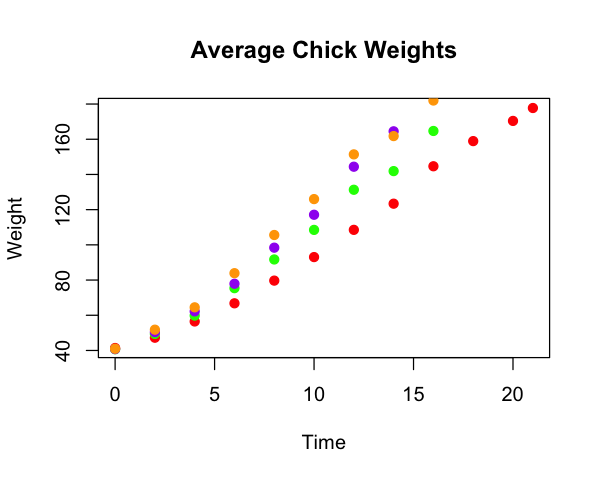

In [36]:
plot(pcwag$Time,   pcwag$diet1, pch=19, col='red', xlab="Time", ylab="Weight")
points(pcwag$Time, pcwag$diet2, pch=19, col='green')
points(pcwag$Time, pcwag$diet3, pch=19, col='purple')
points(pcwag$Time, pcwag$diet4, pch=19, col='orange')
title(main="Average Chick Weights")

Let's make a few observations.

* The `plot` function creates a new plot window each time it is called.
  If you want to plot multiple sets, you have to call something else
  that does't start a new plot window.  In this case, since we're making
  points, we call the `points` function.

* We changed the point character from its default (which is a hollow circle)
  to a solid circle (`pch=19`).

* Note that the y-axis was optimized for `diet1`.  But the other diets
  have larger weights that run off the top of the graph.  We can fix this
  by determining the range before hand and setting it with the `xlim` parametr
  in the `plot` command.

* There is no legend indicating which color maps to which diet.

Let's remedy the last two issues.

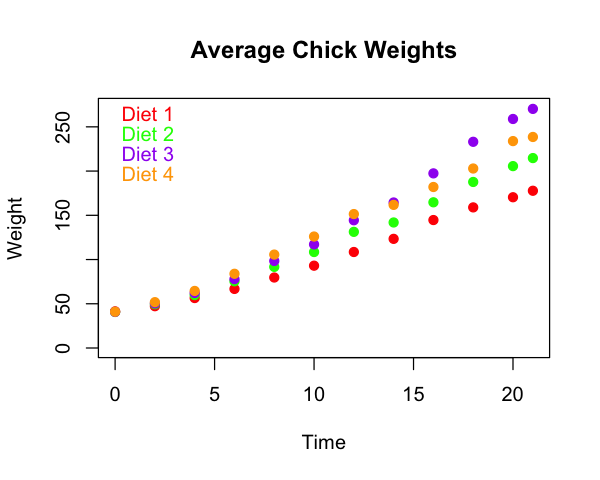

In [37]:
max_weight <- max(pcwag)
plot(pcwag$Time,   pcwag$diet1, pch=19, col='red',
     xlab="Time", ylab="Weight", ylim=c(0, max_weight + 1))
points(pcwag$Time, pcwag$diet2, pch=19, col='green')
points(pcwag$Time, pcwag$diet3, pch=19, col='purple')
points(pcwag$Time, pcwag$diet4, pch=19, col='orange')
title(main="Average Chick Weights")
legend('topleft', c('Diet 1', 'Diet 2', 'Diet 3', 'Diet 4'),
         text.col=c('red', 'green', 'purple', 'orange'), 
         bty='n', cex=1, y.intersp=2)

**Exercise** Now it's your turn.  Make the same plot with lines
instead of points.  Are the the differences.

* The plot command defaults to points.  You override this default with the
  `type` parameter.  For a line, you want `type='l'` where the value is the
  letter `l` for "line".  This parameter should replace the `pch=19` parameter.
  You don't a `pch` parameter for lines.

* Instead of the `points` command, use the `lines` command.  The `line` command
  doesn't need a `pch` parameter.

# Functions of a Random Variable

**Note:** This section has been reproduced in a file
named `rvFunctions.pdf` via LaTeX since Jupyter/Pandoc seems to
have trouble printing aligned equations or converting them to
PDF.

We've been discussing random variables, their CDF and PDF, and their
moment generating functions.  We've done a few exercises involed with
caculating their means and variance.  The random variables we've discussed
so far directly modeled certain phenomena, such as a coin flip, the number
of heads in multiple coin flips, and selecting a number randomly from a set
of numbers.  This is all very nice; but it's time to step up our game and
consider random variables that arise as a function of other random variables.

Let's remind ourselves of what a random variable is.
A random variable maps from an abstract event space to points on
the real number line.  Often the event space won't be so abstract
and the mapping will be quite natural; so natural that we often just
write $X$ rather than
$X(\omega) \in \mathcal{R}$ for $\omega \in \Omega$.

![Random Variable](rv1.png)

By mapping from "event spaces" to the concrete real number line,
random variables allow us to directly employ analytic techniques
that have long existed for the real number line.  Our
cumulative distribution functions and probability density functions
are defined on the real nmber line by virtue of the random variable
mapping events to the real number line.

A function of a random variable simply maps the points from one
real number line to another real number line.  In this way, a function
of a random variable create a new random variable on the same event
space, i.e. a new way to map events to real numbers.

![Random Variable Function](rv2.png)

In the figure above, $g(x) = x^2$ is such a function.  If we define
$Y$ as the result of mapping
$\Omega \rightarrow \mathcal{R} \rightarrow \mathcal{R}$, then
$Y$ is also a random variable.

Assuming that such a mapping is useful (and we'll find out later that
this one is), we'll want to know the CDF and PDF of the new
random variable.  Unfortunately, it's not as simply as plugging
$x^2$ everywhere you see an $x$.

Using the figure above as an example, let's determine $F_Y(y)$ from
basic principals.  The basic principal is

$$
F_Y(y) = P[Y \le y]
$$

From this principal we plug in the function to derive the expression.
Since $Y = g(X) = X^2$, we restrict our attention to $y \gt 0$ since
$F_Y(y) = 0$ for $y \le 0$.

\begin{aligned}
F_Y(y) &= P[Y \le y] \\
  &= P[X^2 \le y] \\
  &= P\left[-\sqrt{y} \le X \le \sqrt{y}\right] \\
  &= P\left[X \le \sqrt{y}\right] - P\left[X \le -\sqrt{y}\right]
\end{aligned}

This gives us the CDF for Y.  It's close to simply substituting
$\sqrt{y}$ for $x$ into the expression for $F_X$.  Now that we have
the CDF, we can derive the PDF.

\begin{aligned}
f_Y(y) &= \frac{d}{dy}F_Y(y) \\
   &= \frac{d}{dy}\left[ F_x(\sqrt{y}) - F_X(-\sqrt{y}) \right] \\
   &= \left. \frac{dF_X}{dx} \right\rvert_{x=\sqrt{y}} \frac{dx}{dy} - 
   \left. \frac{dF_X}{dx} \right\rvert_{x=-\sqrt{y}} \frac{dx}{dy} \\
   &= \frac{1}{2\sqrt{y}} \left( f_x(\sqrt{y}) - f_x(-\sqrt{y}) \right)
\end{aligned}

where

$$
\frac{dx}{dy} = \frac{d y^{\frac{1}{2}}}{dy} = \frac{1}{2}y^{-\frac{1}{2}}
$$

The expression for $f_Y$ in terms of $f_X$ in this specific case of
$Y = X^2$ demonstrates two important complications.

1. If $g$ is not 1-to-1, then we must account for all the points
   in $g^{-1}(y)$.  In the case of a quadratic, there are usually
   two.

2. The $f_Y$ expression introduced an additional multiplicative
   factor, known in calculus circles as *the Jacobian*.  The
   Jacobian incorporates the stretch factor introduced by the
   transformation.

It's reasonable to ask why the CDF didn't need a stretch factor.
It's because we don't integrate the CDF.  We just evaluate it at
various points.  **The value of the CDF at any point represents
a probability.**

This is not the case with a continuous density function.  The
value of $f_X$ at point does not really mean anything **by itself.
It certainly does not represent a probability.**  We only get
probabilities from $f_X$ by integrating it over some interval
or combination of intervals.  In other words, it's only the
area under $f_X$ that has a probability interpretation.  You
can't say anything about an area with just the height.  You
need to also specify the width.  So in the case of our transformation
$g$, it's not enough to determine the height of $f_Y$ at a certain
point though corresponding values of $f_X$.  We need to know how
$g$ is stretching the differential widths to get the full picture
of how areas under $f_X$ transform to *areas* under $f_Y$.  The
Jacobian factor provides this "width stretching" information.

We're still playing in the realm in probability.  In the next
workshop, we're going to consider special functions of a random
variable (like the average of a sample) and cross over into
*statistics* proper.

# End Notes

1. I noted that the `Date` class represents the date internally as the
   number of days since January 1, 1970.  Dates before that are
   represented by a negative number.

2. I like the `reshape2` package that we worked with in the pivot section
   because it is small and simple.
   It seems these days that practitioners are moving to `dplyr` and its
   companions within the **tidyverse**.  We'll be covering this in the Fall.

3. Note how we pivoted the `Diet` column in order to plot all the diets
   together with the base plot system.  Other R plotting systems like
   **ggplot2** actually prefer the long format and plot the different
   factors automatically.  We'll begin studying `ggplot` soon.

4. Probably the most important case of the random variable transformation
   $Y = X^2$ is when $X$ is a normal random variable.  In this case Y is
   the so-call **Chi-Squared** distribution famous for its goodness-of-fit
   tests.

5. In differential geometry circles, the necessity of the stretch factor
   for $f_Y$ but not for $F_Y$ is expressed as "$F_Y$ is a function
   (0-form) while $f_Y$ is a 1-form."

----------
End of Workshop 4